# PXD018549
## Topoisomerase I Poisoning by Electrophiles Derived from Oxidative Stress
[PRIDE link](https://www.ebi.ac.uk/pride/archive/projects/PXD018549)

[Article link](https://linkinghub.elsevier.com/retrieve/pii/S2451945620304748)

In [1]:
#Import libraries
os.chdir("/home/robbe/ionbot/")
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import re
import numpy as np
import os
from pathlib import Path
from pyteomics import mass as pymass
import OxiAnalysis as OA
import importlib
importlib.reload(OA)
import warnings; warnings.simplefilter('ignore')

# Analysis without quant data

In [2]:
first = pd.read_csv("/home/robbe/ionbot/full_projects_/PXD018549//PXD018549_first.csv")
del first["Unnamed: 0"]
del first["spectrum_title"]
del first["scan"]
first['modifications'] = first['modifications'].fillna("None")
first['Oxidant treatment'] = first['Oxidant treatment'].fillna("None")
first['Secondary treatment'] = first['Secondary treatment'].fillna("None")
first['Length of Secondary treatment (mins)'] = first['Length of Secondary treatment (mins)'].fillna(0)
first['Length of oxidant treatment (mins)'] = first['Length of oxidant treatment (mins)'].replace('0', 0)

In [3]:
first.head()

,ionbot_match_id,spectrum_file,precursor_mass,peptide_mass,observed_retention_time,charge,database_peptide,matched_peptide,modifications,modifications_delta,...,Organism,Cell line,Oxidant treatment,Oxidant dose (µM),Secondary treatment,Secondary treatment dose (µM),Length of oxidant treatment (mins),Length of Secondary treatment (mins),Notes,First/Lower/Coeluting
0,0_8228_1,qe1_2019oct05_05_uc190822_dw35_1c,1044.54526,1046.54298,1435.58130,2,VLEGMEVVR,VLEGMEVVR,5|[35]oxidation[M],5|15.9949,...,Human,A549,None,0.0,None,0,0,0,NaN,First
1,0_8231_1,qe1_2019oct05_05_uc190822_dw35_1c,984.49975,984.50284,1435.84356,2,AIYQATYR,AIYQATYR,None,0|,...,Human,A549,None,0.0,None,0,0,0,NaN,First
2,0_8232_3,qe1_2019oct05_05_uc190822_dw35_1c,992.52671,992.52907,1435.93740,2,EFVISDRK,EFVISDRK,None,0|,...,Human,A549,None,0.0,None,0,0,0,NaN,First
3,0_8235_3,qe1_2019oct05_05_uc190822_dw35_1c,1847.92462,1847.92646,1436.20068,3,ITDSAGHILYSKEDATK,ITDSAGHILYSKEDATK,None,0|,...,Human,A549,None,0.0,None,0,0,0,NaN,First
4,0_8236_1,qe1_2019oct05_05_uc190822_dw35_1c,1464.66562,1464.66670,1436.27616,3,SYCAEIAHNVSSK,SYCAEIAHNVSSK,3|[4]carbamidomethyl[C],3|57.0215,...,Human,A549,None,0.0,None,0,0,0,NaN,First


In [17]:
print("The amount of PSMs in this project dataset is: ", first.shape[0])
print("The amount of raw files that make up the master dataset is: ", len(first["spectrum_file"].unique()))

The amount of PSMs in this project dataset is:  308075
The amount of raw files that make up the master dataset is:  19


In [18]:
first['Peptidoform_name'] = first.apply(lambda row: OA.peptidoform_name(row), axis=1)
first['Position'] = first['modifications'].apply(OA.get_positions)
first['Modification'] = first['modifications'].apply(OA.get_modification)
first['Oxidatively_modified'] = first['modifications'].apply(OA.oxidatively_modified)


In [19]:
first.head()

,ionbot_match_id,spectrum_file,precursor_mass,peptide_mass,observed_retention_time,charge,database_peptide,matched_peptide,modifications,modifications_delta,...,Secondary treatment,Secondary treatment dose (µM),Length of oxidant treatment (mins),Length of Secondary treatment (mins),Notes,First/Lower/Coeluting,Peptidoform_name,Position,Modification,Oxidatively_modified
0,0_8228_1,qe1_2019oct05_05_uc190822_dw35_1c,1044.54526,1046.54298,1435.58130,2,VLEGMEVVR,VLEGMEVVR,5|[35]oxidation[M],5|15.9949,...,None,0,0,0,NaN,First,VLEGM[35]oxidationEVVR,5,[35]oxidation[M],True
1,0_8231_1,qe1_2019oct05_05_uc190822_dw35_1c,984.49975,984.50284,1435.84356,2,AIYQATYR,AIYQATYR,None,0|,...,None,0,0,0,NaN,First,AIYQATYR,None,None,False
2,0_8232_3,qe1_2019oct05_05_uc190822_dw35_1c,992.52671,992.52907,1435.93740,2,EFVISDRK,EFVISDRK,None,0|,...,None,0,0,0,NaN,First,EFVISDRK,None,None,False
3,0_8235_3,qe1_2019oct05_05_uc190822_dw35_1c,1847.92462,1847.92646,1436.20068,3,ITDSAGHILYSKEDATK,ITDSAGHILYSKEDATK,None,0|,...,None,0,0,0,NaN,First,ITDSAGHILYSKEDATK,None,None,False
4,0_8236_1,qe1_2019oct05_05_uc190822_dw35_1c,1464.66562,1464.66670,1436.27616,3,SYCAEIAHNVSSK,SYCAEIAHNVSSK,3|[4]carbamidomethyl[C],3|57.0215,...,None,0,0,0,NaN,First,SYC[4]carbamidomethylAEIAHNVSSK,3,[4]carbamidomethyl[C],False


## Overview of the treatments in this project

In [20]:
first.groupby(["Oxidant treatment", "Oxidant dose (µM)", "Length of oxidant treatment (mins)", "Secondary treatment", "Secondary treatment dose (µM)", 'Length of Secondary treatment (mins)',"Notes"], dropna=False)["ionbot_match_id"].count().to_frame().reset_index()

,Oxidant treatment,Oxidant dose (µM),Length of oxidant treatment (mins),Secondary treatment,Secondary treatment dose (µM),Length of Secondary treatment (mins),Notes,ionbot_match_id
0,CPT,0.1,4320,NOne,0,0,NaN,17638
1,CPT,0.1,4320,None,0,0,NaN,88935
2,None,0.0,0,None,0,0,Top1 was incubated with 200 µM HNE,1876
3,None,0.0,0,None,0,0,NaN,99554
4,TPT,0.1,4320,None,0,0,NaN,100072


### Conditions that will be compared
| Treatment 1 | Treatment 2 |
| ----------- | ----------- |
| CPT| Control |
| TPT | Control |
| CPT | TPT |

There is also a special setting where Top1 was incubated with 200 µM HNE, we'll see later what to do with it

In [21]:
from cmath import nan
CPT = first.loc[lambda first: first["Oxidant treatment"] == "CPT"]
TPT = first.loc[lambda first: first["Oxidant treatment"] == "TPT"]
Control = first.loc[lambda first: (first["Oxidant treatment"] == "None") & (first["Notes"] != "Top1 was incubated with 200 µM HNE")]
Special = first.loc[lambda first: (first["Notes"] == "Top1 was incubated with 200 µM HNE")]

## Comparison between the treatments
### 1) CPT vs Control

In [22]:
print("There are this many replicates of each treatment: {}".format(CPT["spectrum_file"].nunique()))

There are this many replicates of each treatment: 6


In [23]:
CPTrep = OA.replicate_filter(CPT, 6)
Controlrep = OA.replicate_filter(Control, 6)

In [24]:
print("The ratio of PSMs that contain an oxidative modification in the CPT treatment subset: {}".format((CPTrep['Oxidatively_modified'].value_counts(normalize=True).mul(100).astype(str)+' %')[1]))
print("The ratio of PSMs that contain an oxidative modification in the Control treatment subset: {}".format((Controlrep['Oxidatively_modified'].value_counts(normalize=True).mul(100).astype(str)+' %')[1]))

The ratio of PSMs that contain an oxidative modification in the CPT treatment subset: 9.709379128137384 %
The ratio of PSMs that contain an oxidative modification in the Control treatment subset: 10.302749459375965 %


In [25]:
mrCPTrep = OA.modratios(CPTrep)
mrControlrep = OA.modratios(Controlrep)

In [26]:
modr = pd.merge(mrCPTrep,mrControlrep, on="Modification", suffixes=('_CPT', '_Control'))
modr["Difference"] = modr["Ratios_CPT"] - modr["Ratios_Control"]
modr = modr.drop(modr[(modr["Ratios_CPT"] == 0) & (modr["Ratios_Control"] == 0)].index)
modr

,Modification,Ratios_CPT,Ratios_Control,Difference
1,[35]Oxidation[T],0.000609,0.000000,0.000609
6,[35]Oxidation[I],0.000162,0.000000,0.000162
11,[35]Oxidation[V],0.000000,0.000187,-0.000187
16,[35]Oxidation[P],0.005835,0.006955,-0.001119
17,[35]Oxidation[N],0.000204,0.000000,0.000204
28,[345]Trioxidation[C],0.000000,0.059701,-0.059701
96,[35]oxidation[M],0.798867,0.747674,0.051192


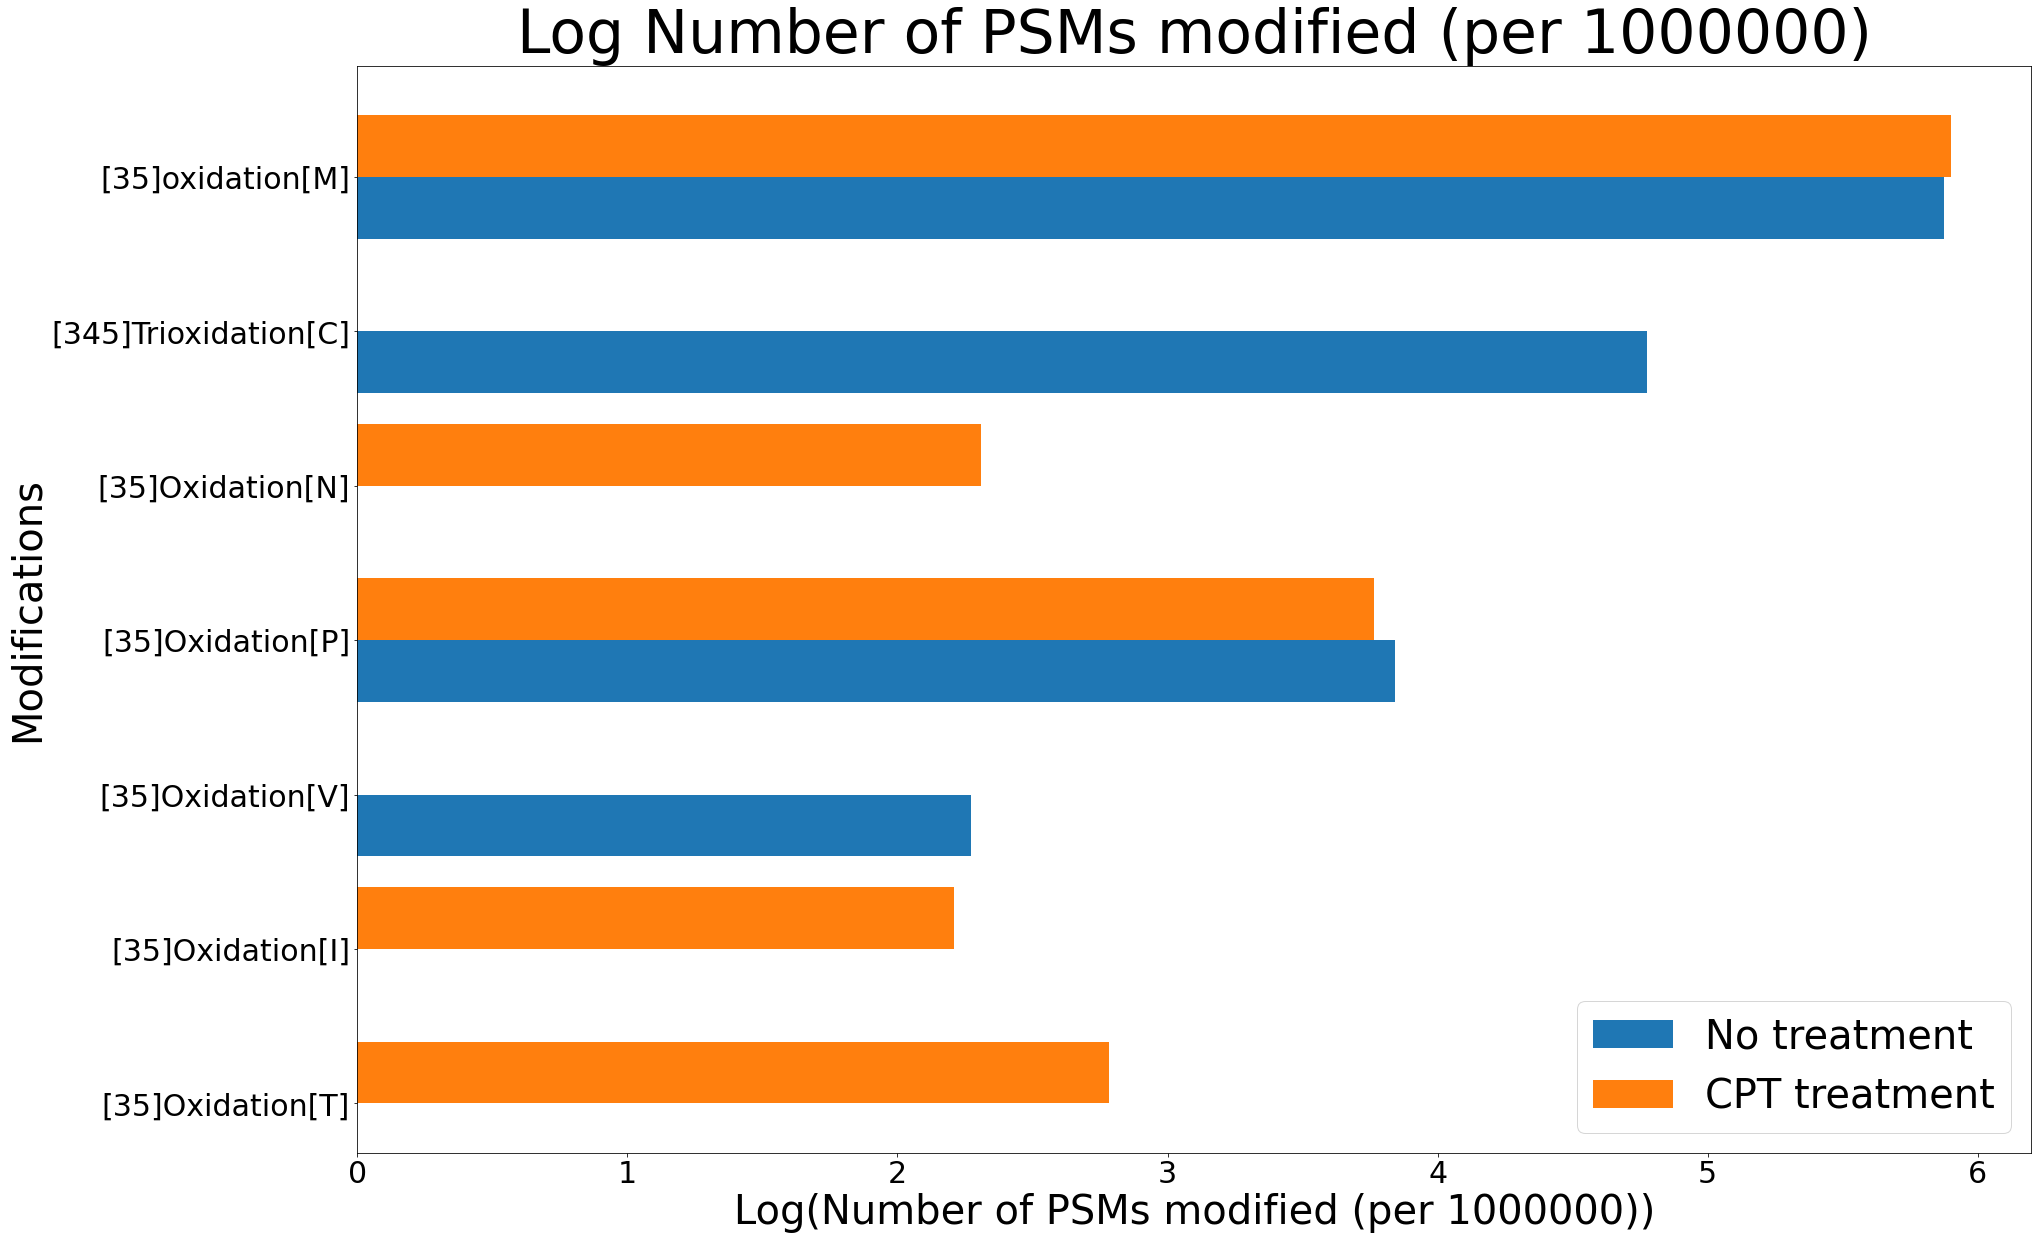

In [27]:
y = modr["Modification"]
xnone = np.log10(modr['Ratios_Control']*1000000)
xH = np.log10(modr['Ratios_CPT']*1000000)
y_axis = np.arange(len(y))
plt.figure(figsize=(30,20))
plt.barh(y_axis - 0.2, xnone, 0.4, label = 'No treatment')
plt.barh(y_axis + 0.2, xH, 0.4, label = 'CPT treatment')

plt.yticks(y_axis, y)
plt.ylabel("Modifications", fontsize = 40)
plt.xlabel("Log(Number of PSMs modified (per 1000000))", fontsize = 40)
plt.title("Log Number of PSMs modified (per 1000000)", fontsize = 60)
plt.tick_params(axis='both', which='major', labelsize=30)
plt.legend(fontsize = 40)
plt.show()

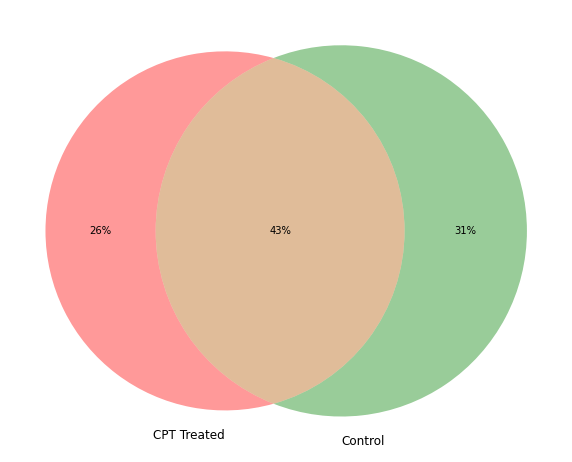

In [28]:
OA.condition_venn([CPTrep, Controlrep], ["CPT Treated", "Control"])

In [29]:
difflist, pf_only_treatment = OA.comparelist(CPTrep,Controlrep)
pf_only_treatment.head()

,ionbot_match_id,spectrum_file,precursor_mass,peptide_mass,observed_retention_time,charge,database_peptide,matched_peptide,modifications,modifications_delta,...,Secondary treatment,Secondary treatment dose (µM),Length of oxidant treatment (mins),Length of Secondary treatment (mins),Notes,First/Lower/Coeluting,Peptidoform_name,Position,Modification,Oxidatively_modified
51351,0_8401_1,qe1_2019oct05_09_uc190822_dw35_2c,1098.56736,1098.56690,1442.53158,2,GTVEPQLEAR,GTVEPQLEAR,None,0|,...,None,0,4320,0,NaN,First,GTVEPQLEAR,None,None,False
51366,0_8416_1,qe1_2019oct05_09_uc190822_dw35_2c,1347.65232,1347.65175,1444.17300,2,VVTDTDETELAR,VVTDTDETELAR,None,0|,...,None,0,4320,0,NaN,First,VVTDTDETELAR,None,None,False
51371,0_8425_1,qe1_2019oct05_09_uc190822_dw35_2c,1072.55124,1072.55120,1445.28702,2,LSSPATLNSR,LSSPATLNSR,3|[122]Formyl[S],3|27.9949,...,None,0,4320,0,NaN,First,LSS[122]FormylPATLNSR,3,[122]Formyl[S],False
51402,0_8470_1,qe1_2019oct05_09_uc190822_dw35_2c,1347.65244,1347.65175,1449.87948,2,VVTDTDETELAR,VVTDTDETELAR,None,0|,...,None,0,4320,0,NaN,First,VVTDTDETELAR,None,None,False
51711,0_9017_1,qe1_2019oct05_09_uc190822_dw35_2c,1044.50950,1043.50358,1507.30086,2,YGAATFTSAR,YGAATFTSAR,None,0|,...,None,0,4320,0,NaN,First,YGAATFTSAR,None,None,False


In [30]:
onlytreatment = OA.modcounts(pf_only_treatment)
onlytreatment = onlytreatment.sort_values("Counts", ascending = False).drop(onlytreatment[onlytreatment["Counts"] == 0].index, axis=0)
onlytreatment

,Modification,Counts
96,[35]oxidation[M],263
1,[35]Oxidation[T],3
6,[35]Oxidation[I],1
17,[35]Oxidation[N],1


In [31]:
RPMCPT = OA.relative_PSM_modification(CPTrep)
RPMControl = OA.relative_PSM_modification(Controlrep)

In [32]:
RPM = pd.merge(RPMCPT,RPMControl, on="Amino acid", suffixes=('_CPT', '_Control'))
RPM

,Amino acid,Relative level of PSMs containing unmodified residue_CPT,Relative level of PSMs containing unmodified residue_Control
0,A,1.000000,1.000000
1,R,1.000000,1.000000
2,N,0.988956,0.968184
3,D,1.000000,1.000000
4,C,0.051852,0.000000
5,Q,0.992971,0.993575
6,E,0.995177,0.995587
7,G,1.000000,1.000000
8,H,0.892183,0.903509
9,I,1.000000,1.000000


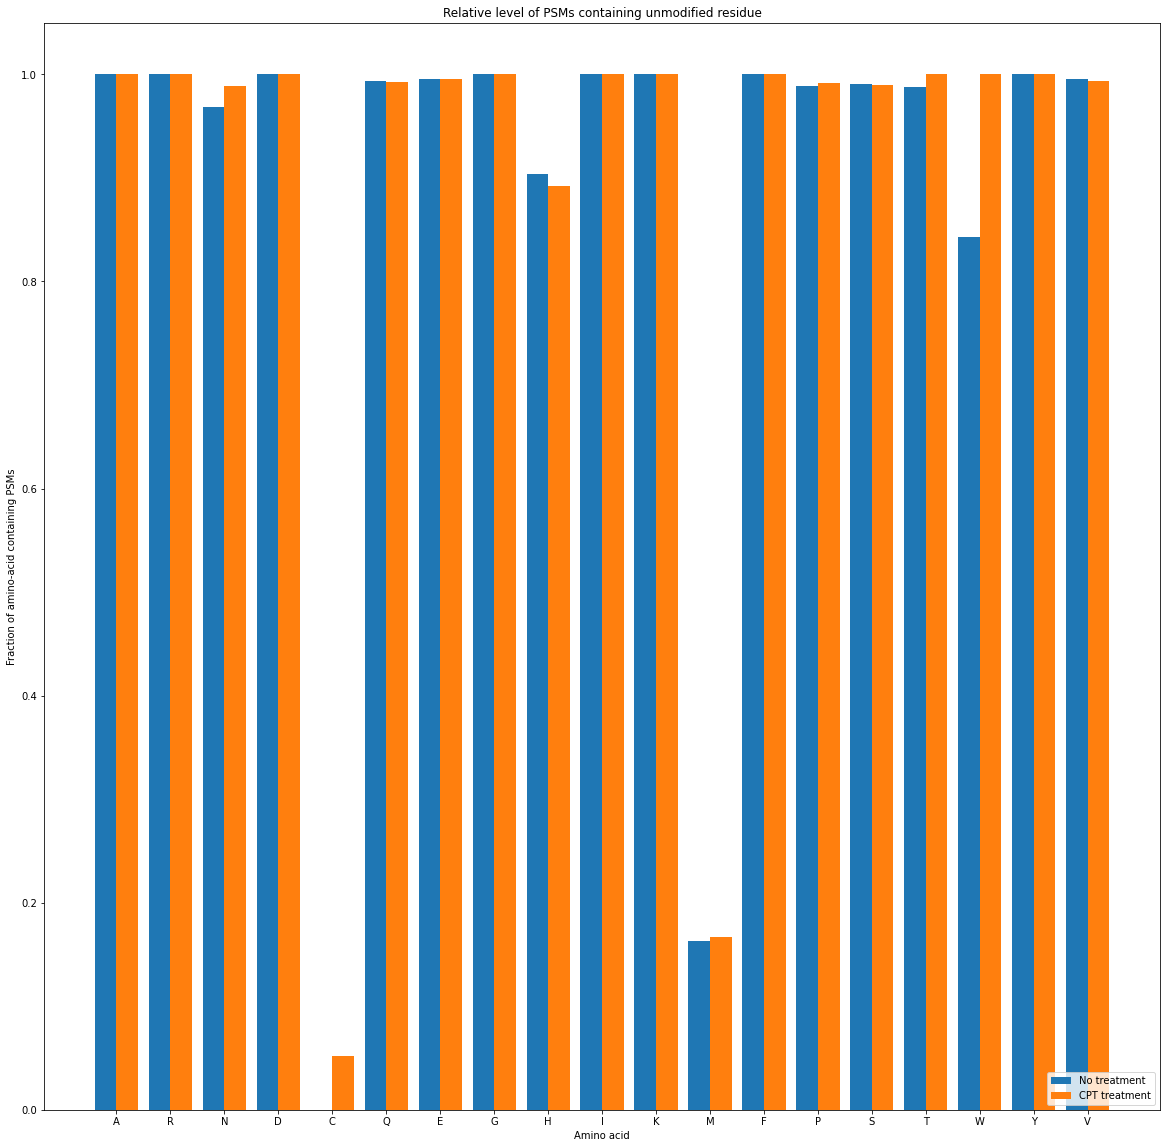

In [34]:
x = RPM["Amino acid"]
xnone = RPM["Relative level of PSMs containing unmodified residue_Control"]
xH = RPM['Relative level of PSMs containing unmodified residue_CPT']
x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, xnone, 0.4, label = 'No treatment')
plt.bar(x_axis + 0.2, xH, 0.4, label = 'CPT treatment')

plt.xticks(x_axis, x)
plt.xlabel("Amino acid")
plt.ylabel("Fraction of amino-acid containing PSMs")
plt.title("Relative level of PSMs containing unmodified residue")
plt.rcParams["figure.figsize"] = (20,20)
plt.legend(loc="lower right")
plt.show()

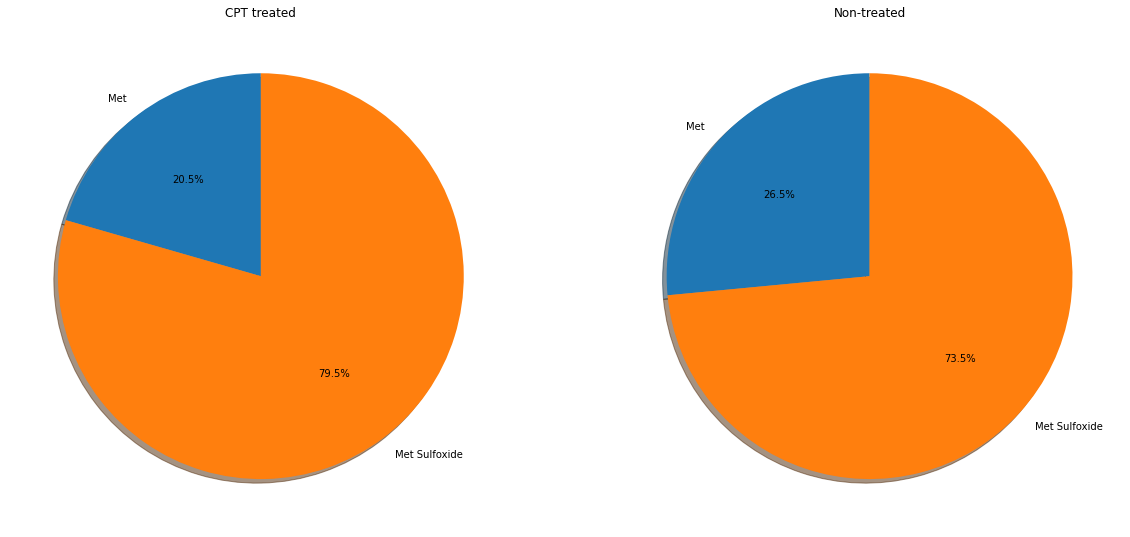

In [35]:
fig, (ax1, ax2) = plt.subplots(1, 2)
OA.methionine_overview(CPTrep, ax1)
OA.methionine_overview(Controlrep, ax2)
plt.title("Methionine containing peptides")
ax1.set_title("CPT treated")
ax2.set_title("Non-treated")
plt.show()

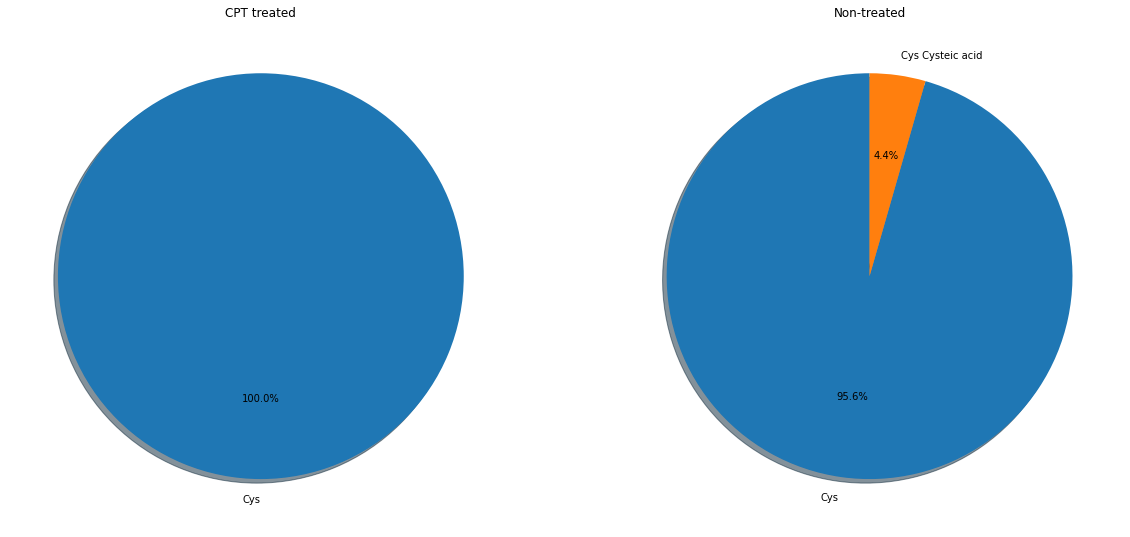

In [36]:
fig, (ax1, ax2) = plt.subplots(1, 2)
OA.cysteine_overview(CPTrep, ax1)
OA.cysteine_overview(Controlrep, ax2)
plt.title("cysteine containing peptides")
ax1.set_title("CPT treated")
ax2.set_title("Non-treated")
plt.show()

In [37]:
OA.differentially_oxidized_psms(CPTrep, Controlrep)

([],
 'There are 0 PSMs that are oxidized in the treatment data that are not oxidized in the control data')

## 2) TPT vs Control

In [38]:
print("There are this many replicates of TPT treatment: {}".format(TPT["spectrum_file"].nunique()))

There are this many replicates of TPT treatment: 6


In [39]:
TPTrep = OA.replicate_filter(TPT, 6)

In [40]:
print("The ratio of PSMs that contain an oxidative modification in the TPT treatment subset: {}".format((TPTrep['Oxidatively_modified'].value_counts(normalize=True).mul(100).astype(str)+' %')[1]))
print("The ratio of PSMs that contain an oxidative modification in the Control treatment subset: {}".format((Controlrep['Oxidatively_modified'].value_counts(normalize=True).mul(100).astype(str)+' %')[1]))

The ratio of PSMs that contain an oxidative modification in the TPT treatment subset: 9.366624347580759 %
The ratio of PSMs that contain an oxidative modification in the Control treatment subset: 10.302749459375965 %


In [41]:
mrTPTrep = OA.modratios(TPTrep)

In [42]:
modr2 = pd.merge(mrTPTrep,mrControlrep, on="Modification", suffixes=('_TPT', '_Control'))
modr2["Difference"] = modr2["Ratios_TPT"] - modr2["Ratios_Control"]
modr2 = modr2.drop(modr2[(modr2["Ratios_TPT"] == 0) & (modr2["Ratios_Control"] == 0)].index)
modr2

,Modification,Ratios_TPT,Ratios_Control,Difference
11,[35]Oxidation[V],0.000141,0.000187,-0.000046
16,[35]Oxidation[P],0.007617,0.006955,0.000662
28,[345]Trioxidation[C],0.000000,0.059701,-0.059701
96,[35]oxidation[M],0.704319,0.747674,-0.043355


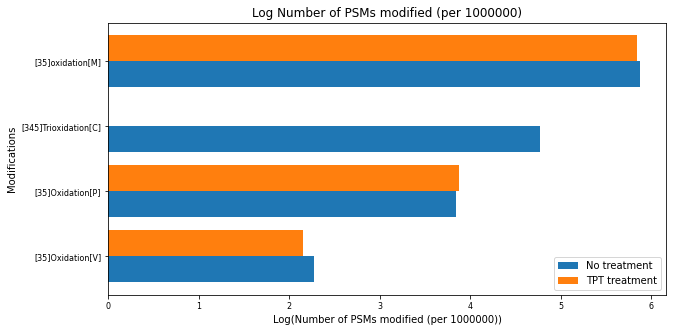

In [43]:
y = modr2["Modification"]
xnone = np.log10(modr2['Ratios_Control']*1000000)
xH = np.log10(modr2['Ratios_TPT']*1000000)
y_axis = np.arange(len(y))
plt.figure(figsize=(10,5))
plt.barh(y_axis - 0.2, xnone, 0.4, label = 'No treatment')
plt.barh(y_axis + 0.2, xH, 0.4, label = 'TPT treatment')

plt.yticks(y_axis, y)
plt.ylabel("Modifications", fontsize = 10)
plt.xlabel("Log(Number of PSMs modified (per 1000000))", fontsize = 10)
plt.title("Log Number of PSMs modified (per 1000000)", fontsize = 12)
plt.tick_params(axis='both', which='major', labelsize=8)
plt.legend(fontsize = 10)
plt.show()

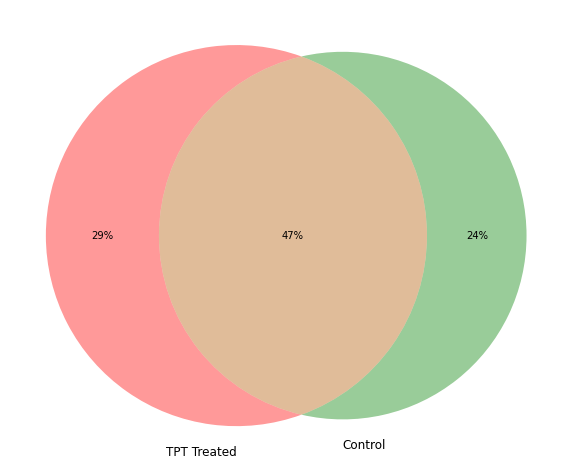

In [44]:
OA.condition_venn([TPTrep, Controlrep], ["TPT Treated", "Control"])

In [45]:
difflist2, pf_only_treatment2 = OA.comparelist(TPTrep,Controlrep)
pf_only_treatment2.head()

,ionbot_match_id,spectrum_file,precursor_mass,peptide_mass,observed_retention_time,charge,database_peptide,matched_peptide,modifications,modifications_delta,...,Secondary treatment,Secondary treatment dose (µM),Length of oxidant treatment (mins),Length of Secondary treatment (mins),Notes,First/Lower/Coeluting,Peptidoform_name,Position,Modification,Oxidatively_modified
104705,0_8369_1,qe1_2019oct05_13_uc190822_dw35_3c,1347.64951,1347.65175,1449.88212,2,VVTDTDETELAR,VVTDTDETELAR,None,0|,...,None,0,4320,0,NaN,First,VVTDTDETELAR,None,None,False
104734,0_8416_1,qe1_2019oct05_13_uc190822_dw35_3c,1072.55149,1072.55120,1455.14226,2,LSSPATLNSR,LSSPATLNSR,6|[122]Formyl[T],6|27.9949,...,None,0,4320,0,NaN,First,LSSPAT[122]FormylLNSR,6,[122]Formyl[T],False
104735,0_8418_1,qe1_2019oct05_13_uc190822_dw35_3c,1347.65244,1347.65175,1455.33012,2,VVTDTDETELAR,VVTDTDETELAR,None,0|,...,None,0,4320,0,NaN,First,VVTDTDETELAR,None,None,False
104758,0_8476_2,qe1_2019oct05_13_uc190822_dw35_3c,1072.55100,1072.55120,1461.53838,2,LSSPATLNSR,LSSPATLNSR,6|[122]Formyl[T],6|27.9949,...,None,0,4320,0,NaN,First,LSSPAT[122]FormylLNSR,6,[122]Formyl[T],False
104800,0_8564_1,qe1_2019oct05_13_uc190822_dw35_3c,1118.59043,1116.57747,1470.60072,2,VTVVDVNESR,VTVVDVNESR,None,0|,...,None,0,4320,0,NaN,First,VTVVDVNESR,None,None,False


In [46]:
onlytreatment2 = OA.modcounts(pf_only_treatment2)
onlytreatment2 = onlytreatment2.sort_values("Counts", ascending=False).drop(onlytreatment2[onlytreatment2["Counts"] == 0].index, axis=0)
onlytreatment2

,Modification,Counts
96,[35]oxidation[M],314


In [47]:
RPMTPT = OA.relative_PSM_modification(TPTrep)

In [48]:
RPM2 = pd.merge(RPMTPT,RPMControl, on="Amino acid", suffixes=('_TPT', '_Control'))
RPM2

,Amino acid,Relative level of PSMs containing unmodified residue_TPT,Relative level of PSMs containing unmodified residue_Control
0,A,1.000000,1.000000
1,R,1.000000,1.000000
2,N,0.975707,0.968184
3,D,0.996880,1.000000
4,C,0.000000,0.000000
5,Q,0.985737,0.993575
6,E,1.000000,0.995587
7,G,1.000000,1.000000
8,H,0.930584,0.903509
9,I,1.000000,1.000000


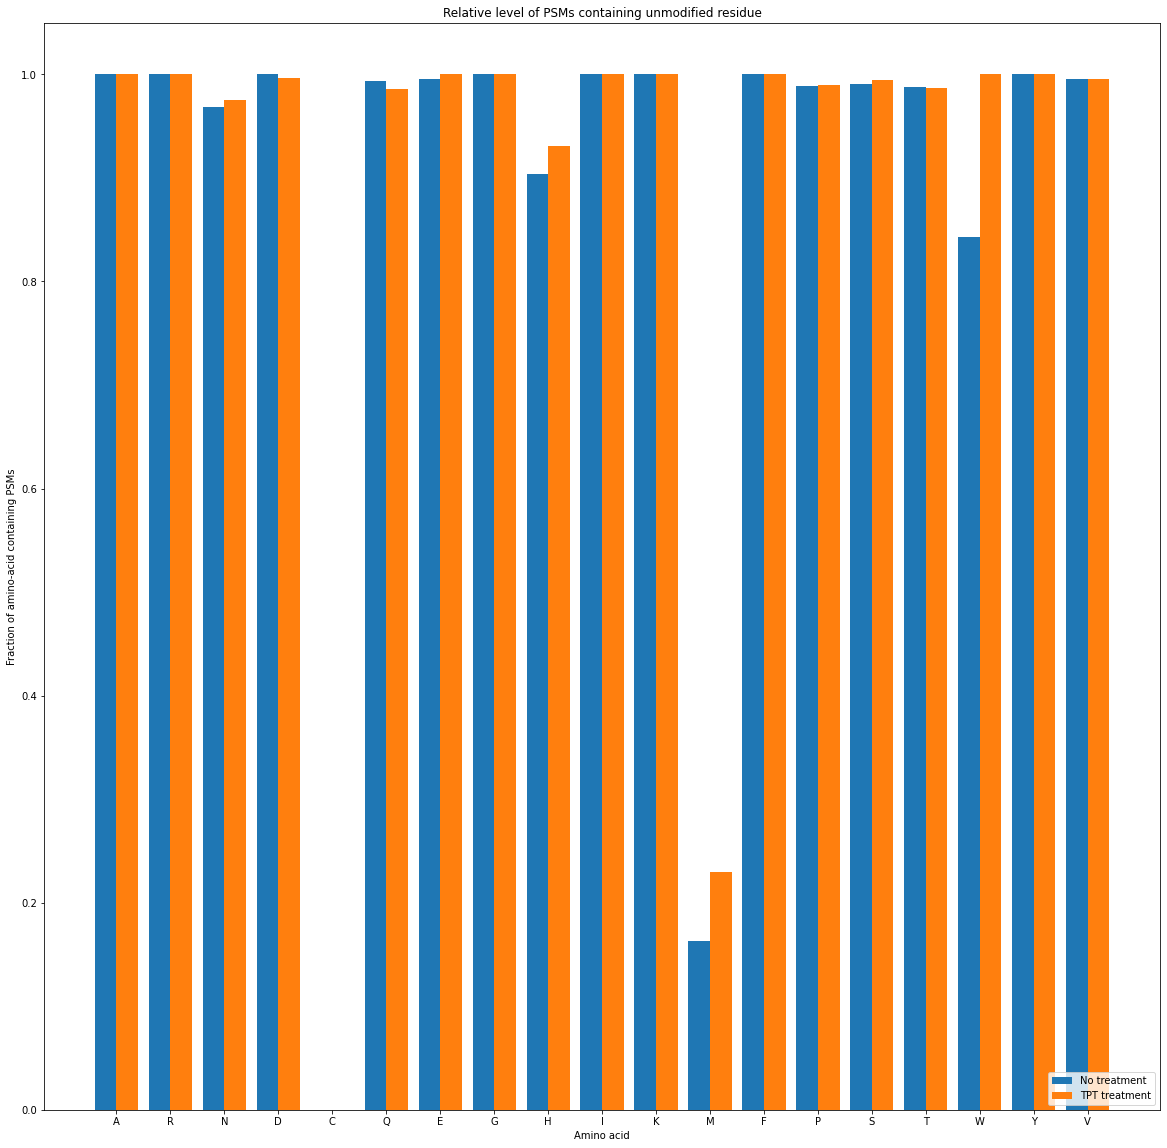

In [49]:
x = RPM2["Amino acid"]
xnone = RPM2["Relative level of PSMs containing unmodified residue_Control"]
xH = RPM2['Relative level of PSMs containing unmodified residue_TPT']
x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, xnone, 0.4, label = 'No treatment')
plt.bar(x_axis + 0.2, xH, 0.4, label = 'TPT treatment')

plt.xticks(x_axis, x)
plt.xlabel("Amino acid")
plt.ylabel("Fraction of amino-acid containing PSMs")
plt.title("Relative level of PSMs containing unmodified residue")
plt.rcParams["figure.figsize"] = (20,20)
plt.legend(loc="lower right")
plt.show()

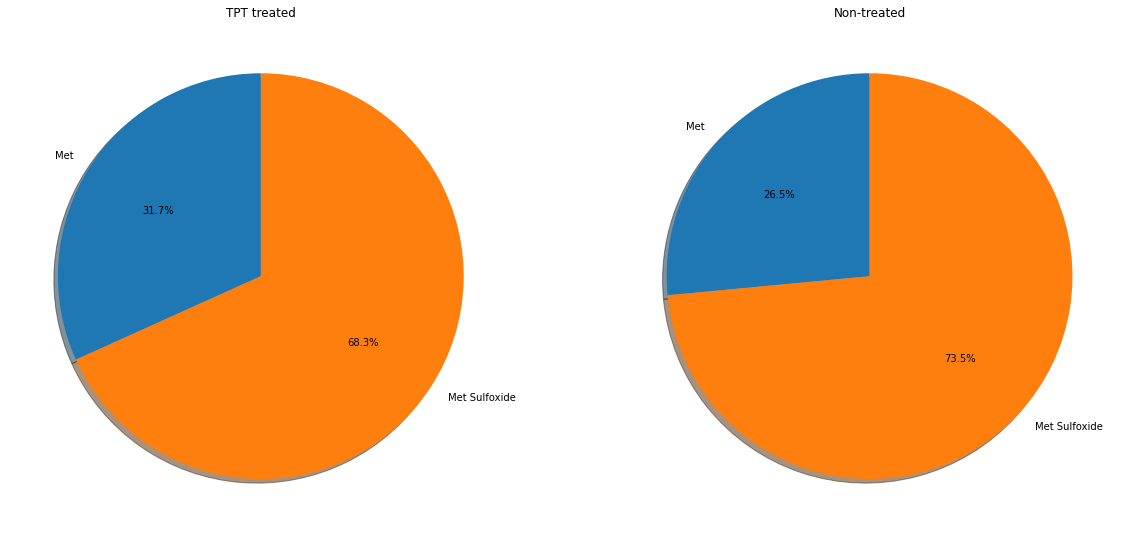

In [50]:
fig, (ax1, ax2) = plt.subplots(1, 2)
OA.methionine_overview(TPTrep, ax1)
OA.methionine_overview(Controlrep, ax2)
plt.title("Methionine containing peptides")
ax1.set_title("TPT treated")
ax2.set_title("Non-treated")
plt.show()

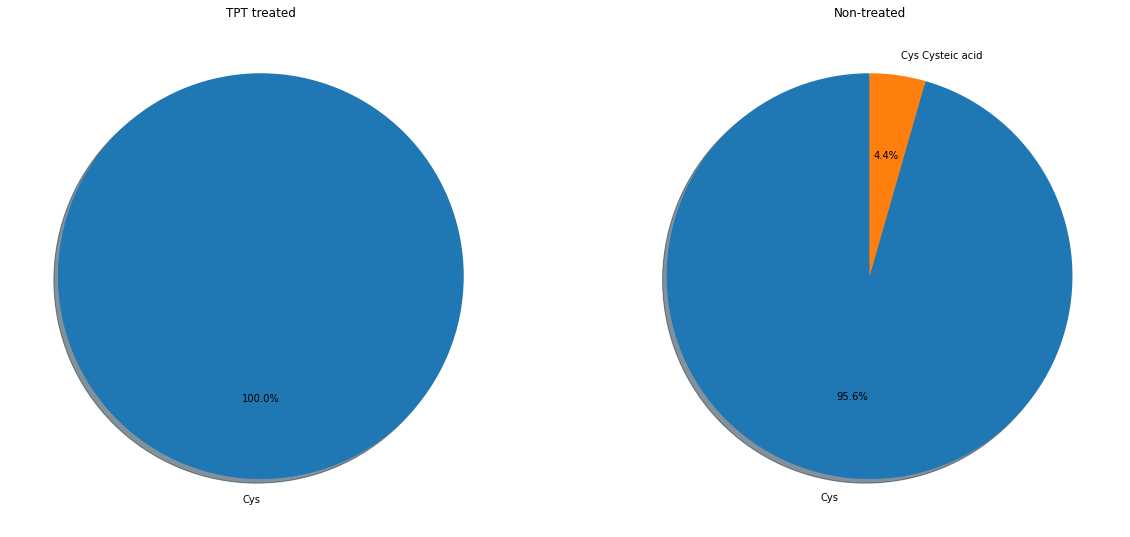

In [51]:
fig, (ax1, ax2) = plt.subplots(1, 2)
OA.cysteine_overview(TPTrep, ax1)
OA.cysteine_overview(Controlrep, ax2)
plt.title("cysteine containing peptides")
ax1.set_title("TPT treated")
ax2.set_title("Non-treated")
plt.show()

In [52]:
OA.differentially_oxidized_psms(TPTrep, Controlrep)

([],
 'There are 0 PSMs that are oxidized in the treatment data that are not oxidized in the control data')

## 3) CPT vs TPT

In [53]:
print("The ratio of PSMs that contain an oxidative modification in the CPT treatment subset: {}".format((CPTrep['Oxidatively_modified'].value_counts(normalize=True).mul(100).astype(str)+' %')[1]))
print("The ratio of PSMs that contain an oxidative modification in the TPT treatment subset: {}".format((TPTrep['Oxidatively_modified'].value_counts(normalize=True).mul(100).astype(str)+' %')[1]))

The ratio of PSMs that contain an oxidative modification in the CPT treatment subset: 9.709379128137384 %
The ratio of PSMs that contain an oxidative modification in the TPT treatment subset: 9.366624347580759 %


In [54]:
modr3 = pd.merge(mrCPTrep,mrTPTrep, on="Modification", suffixes=('_CPT', '_TPT'))
modr3["Difference"] = modr3["Ratios_CPT"] - modr3["Ratios_TPT"]
modr3 = modr3.drop(modr3[(modr3["Ratios_CPT"] == 0) & (modr3["Ratios_TPT"] == 0)].index)
modr3

,Modification,Ratios_CPT,Ratios_TPT,Difference
1,[35]Oxidation[T],0.000609,0.000000,0.000609
6,[35]Oxidation[I],0.000162,0.000000,0.000162
11,[35]Oxidation[V],0.000000,0.000141,-0.000141
16,[35]Oxidation[P],0.005835,0.007617,-0.001782
17,[35]Oxidation[N],0.000204,0.000000,0.000204
96,[35]oxidation[M],0.798867,0.704319,0.094548


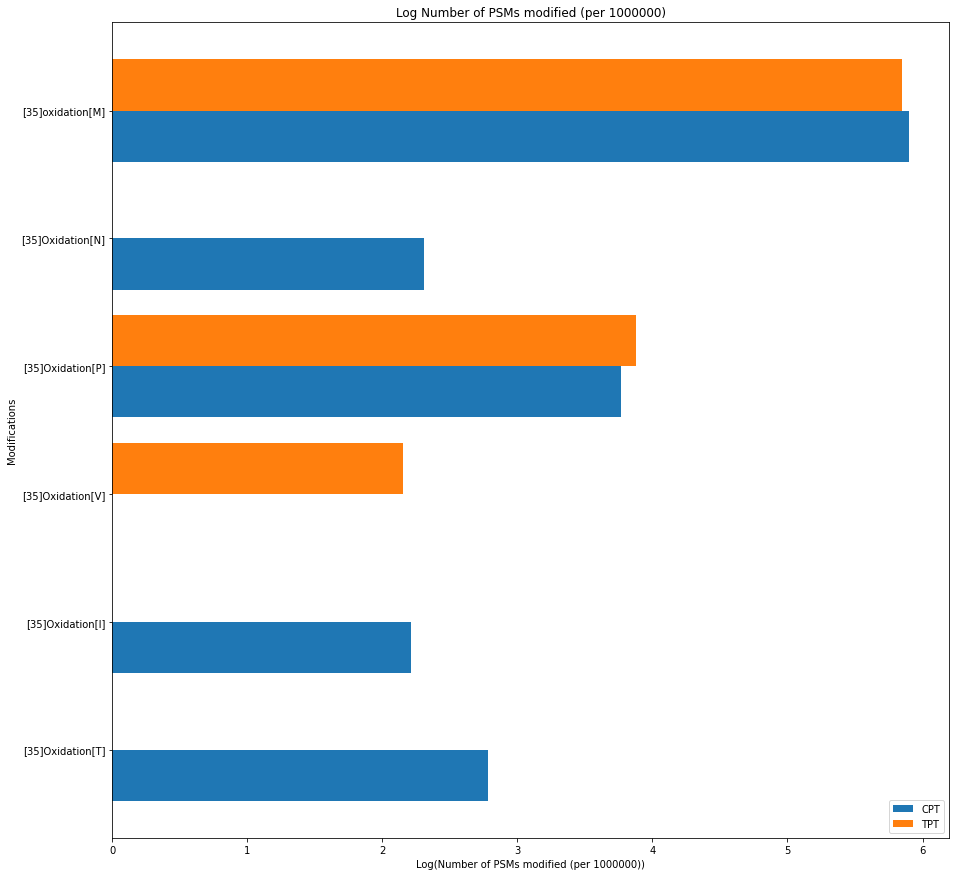

In [55]:
y = modr3["Modification"]
xnone = np.log10(modr3['Ratios_CPT']*1000000)
xH = np.log10(modr3['Ratios_TPT']*1000000)
y_axis = np.arange(len(y))

plt.figure(figsize=(15,15))
plt.barh(y_axis - 0.2, xnone, 0.4, label = 'CPT')
plt.barh(y_axis + 0.2, xH, 0.4, label = 'TPT')

plt.yticks(y_axis, y)
plt.ylabel("Modifications")
plt.xlabel("Log(Number of PSMs modified (per 1000000))")
plt.title("Log Number of PSMs modified (per 1000000)")

plt.legend()
plt.show()

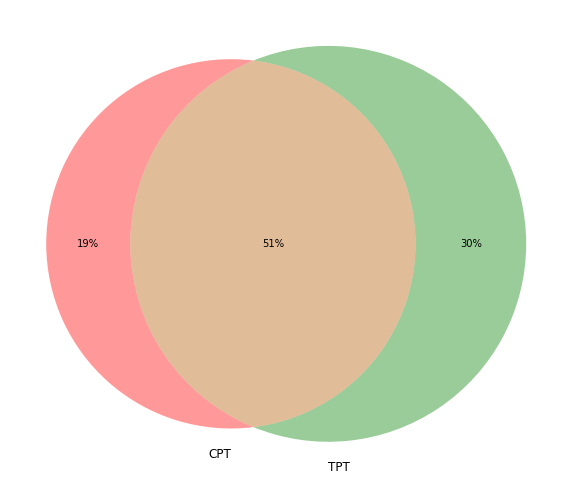

In [56]:
OA.condition_venn([CPTrep, TPTrep], ['CPT', 'TPT'])

In [57]:
difflist3, pf_only_treatment3 = OA.comparelist(CPTrep, TPTrep)
pf_only_treatment3.head()

,ionbot_match_id,spectrum_file,precursor_mass,peptide_mass,observed_retention_time,charge,database_peptide,matched_peptide,modifications,modifications_delta,...,Secondary treatment,Secondary treatment dose (µM),Length of oxidant treatment (mins),Length of Secondary treatment (mins),Notes,First/Lower/Coeluting,Peptidoform_name,Position,Modification,Oxidatively_modified
51351,0_8401_1,qe1_2019oct05_09_uc190822_dw35_2c,1098.56736,1098.56690,1442.53158,2,GTVEPQLEAR,GTVEPQLEAR,None,0|,...,None,0,4320,0,NaN,First,GTVEPQLEAR,None,None,False
51371,0_8425_1,qe1_2019oct05_09_uc190822_dw35_2c,1072.55124,1072.55120,1445.28702,2,LSSPATLNSR,LSSPATLNSR,3|[122]Formyl[S],3|27.9949,...,None,0,4320,0,NaN,First,LSS[122]FormylPATLNSR,3,[122]Formyl[S],False
51526,0_8704_4,qe1_2019oct05_09_uc190822_dw35_2c,1192.63882,1192.63729,1474.41486,3,SVETLKEMIK,SVETLKEMIK,8|[35]oxidation[M],8|15.9949,...,None,0,4320,0,NaN,First,SVETLKEM[35]oxidationIK,8,[35]oxidation[M],True
51539,0_8734_1,qe1_2019oct05_09_uc190822_dw35_2c,1192.57493,1192.63729,1477.77114,2,SVETLKEMIK,SVETLKEMIK,8|[35]oxidation[M],8|15.9949,...,None,0,4320,0,NaN,First,SVETLKEM[35]oxidationIK,8,[35]oxidation[M],True
51827,0_9223_2,qe1_2019oct05_09_uc190822_dw35_2c,1055.51435,1055.51884,1528.73604,2,AHAWPSPYK,AHAWPSPYK,None,0|,...,None,0,4320,0,NaN,First,AHAWPSPYK,None,None,False


In [58]:
onlytreatment3 = OA.modcounts(pf_only_treatment3)
onlytreatment3 = onlytreatment3.sort_values("Counts", ascending=False).drop(onlytreatment3[onlytreatment3["Counts"] == 0].index, axis=0)
onlytreatment3

,Modification,Counts
96,[35]oxidation[M],227
1,[35]Oxidation[T],3
6,[35]Oxidation[I],1
17,[35]Oxidation[N],1


In [59]:
RPM3 = pd.merge(RPMCPT,RPMTPT, on="Amino acid", suffixes=('_CPT', '_TPT'))
RPM3

,Amino acid,Relative level of PSMs containing unmodified residue_CPT,Relative level of PSMs containing unmodified residue_TPT
0,A,1.000000,1.000000
1,R,1.000000,1.000000
2,N,0.988956,0.975707
3,D,1.000000,0.996880
4,C,0.051852,0.000000
5,Q,0.992971,0.985737
6,E,0.995177,1.000000
7,G,1.000000,1.000000
8,H,0.892183,0.930584
9,I,1.000000,1.000000


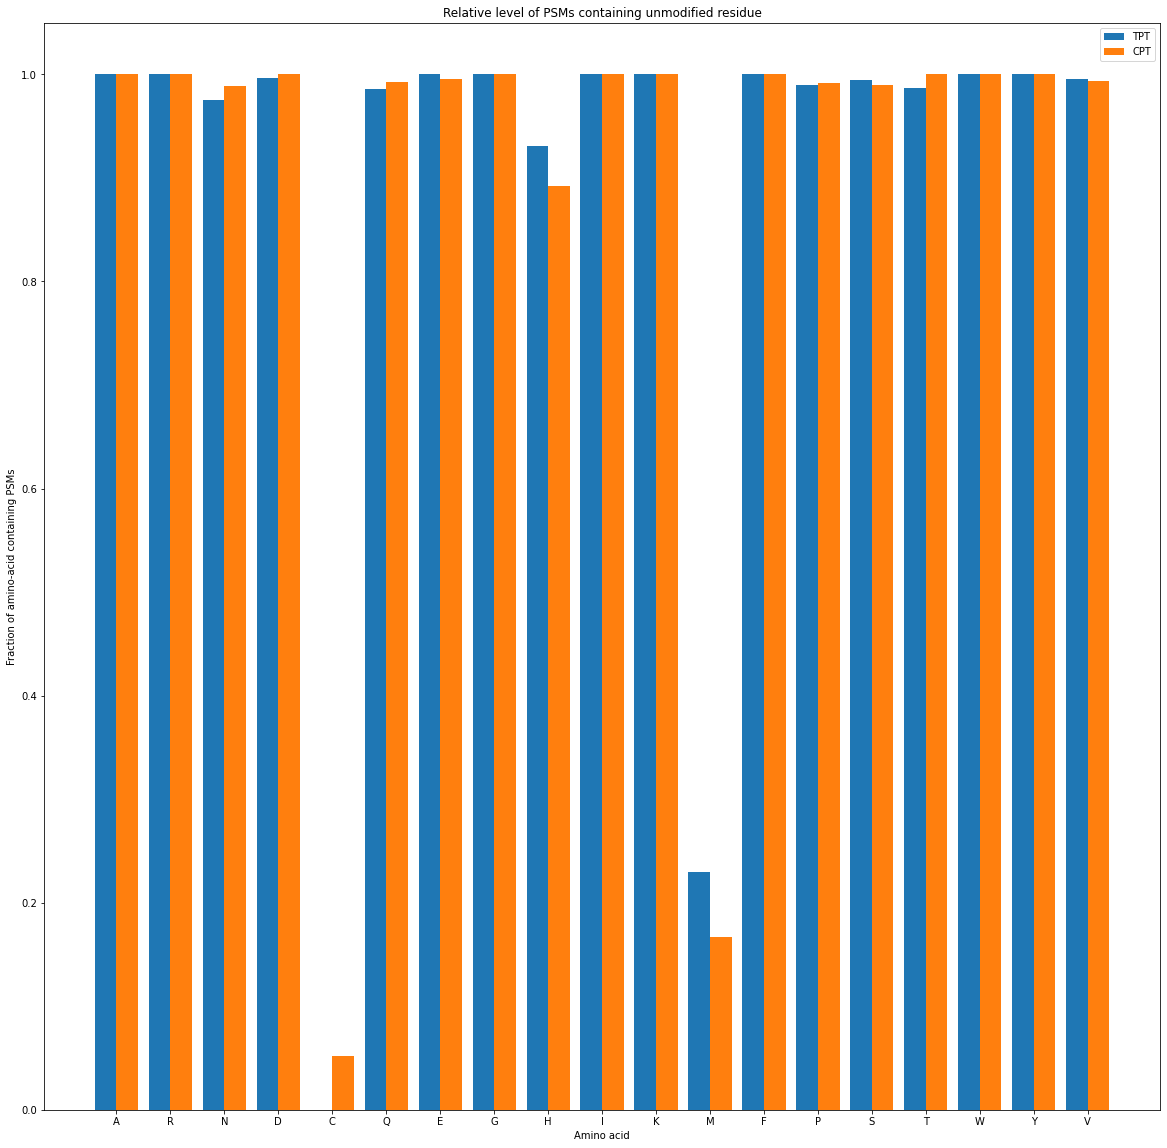

In [60]:
x = RPM3["Amino acid"]
xnone = RPM3["Relative level of PSMs containing unmodified residue_TPT"]
xH = RPM3['Relative level of PSMs containing unmodified residue_CPT']
x_axis = np.arange(len(x))

plt.bar(x_axis - 0.2, xnone, 0.4, label = 'TPT')
plt.bar(x_axis + 0.2, xH, 0.4, label = 'CPT')

plt.xticks(x_axis, x)
plt.xlabel("Amino acid")
plt.ylabel("Fraction of amino-acid containing PSMs")
plt.title("Relative level of PSMs containing unmodified residue")
plt.rcParams["figure.figsize"] = (8,8)
plt.legend()
plt.show()

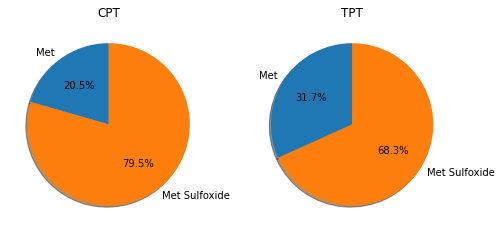

In [61]:
fig, (ax1, ax2) = plt.subplots(1, 2)
OA.methionine_overview(CPTrep, ax1)
OA.methionine_overview(TPTrep, ax2)
plt.title("Methionine containing peptides")
ax1.set_title("CPT")
ax2.set_title("TPT")
plt.rcParams['font.size'] = 10
plt.show()

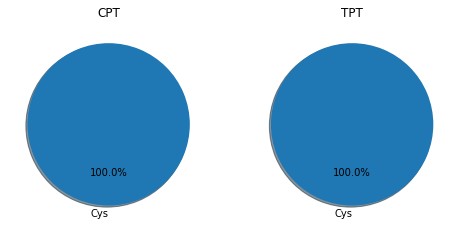

In [62]:
fig, (ax1, ax2) = plt.subplots(1, 2)
OA.cysteine_overview(CPTrep, ax1)
OA.cysteine_overview(TPTrep, ax2)
plt.title("cysteine containing peptides")
ax1.set_title("CPT")
ax2.set_title("TPT")
plt.rcParams['font.size'] = 10
plt.show()

## All three conditions

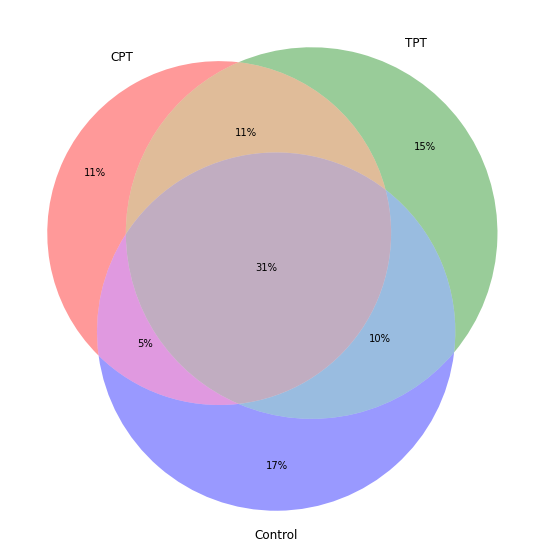

In [46]:
OA.condition_venn([CPTrep, TPTrep, Controlrep], ['CPT', 'TPT', 'Control'])

# Analysis with quant data

In [2]:
quant = pd.read_csv("/home/robbe/ionbot/ionbot_0.9.5/PXD018549/mzml_files/QuantifiedPeptides.tsv", sep="\t")
quant.drop(list(quant.filter(regex = 'Detection Type')), axis = 1, inplace = True)
quant = quant[~quant["Protein Groups"].str.contains("sp|", na=False, regex=False)]

quant.head()


,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_qe1_2019oct05_05_uc190822_dw35_1c,Intensity_qe1_2019oct05_17_uc190822_dw35_4c,Intensity_qe1_2019oct05_06_uc190822_dw35_1b,Intensity_qe1_2019oct05_18_uc190822_dw35_4b,Intensity_qe1_2019oct05_07_uc190822_dw35_1a,...,Intensity_qe1_2019oct05_11_uc190822_dw35_2a,Intensity_qe1_2019oct05_23_uc190822_dw35_5a,Intensity_qe2_192801_P19-UCh_06_DW29_3_Top1_NoIodo,Intensity_qe1_2019oct05_13_uc190822_dw35_3c,Intensity_qe1_2019oct05_25_uc190822_dw35_6c,Intensity_qe1_2019oct05_14_uc190822_dw35_3b,Intensity_qe1_2019oct05_26_uc190822_dw35_6b,Intensity_qe1_2019oct05_15_uc190822_dw35_3a,Intensity_qe1_2019oct05_27_uc190822_dw35_6a,Unnamed: 43
0,AAAAAAAAAAAAAAAGAGAGAK0|[4]Carbamidomethyl[N-T...,AAAAAAAAAAAAAAAGAGAGAK,S12A2_HUMAN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,7.675561e+05,...,0.000000e+00,4.643088e+05,0.0,0.000000,0.000000,0.000000,0.0,4.437400e+05,4.613064e+05,NaN
1,AAAAAAAAAAAAAAAGAGAGAK0|[58]Propionyl[N-TERM],AAAAAAAAAAAAAAAGAGAGAK,S12A2_HUMAN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,1.793066e+06,...,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,NaN
2,AAAAAAAAAAAAAAAGAGAGAK23|[30]Cation:Na[C-TERM],AAAAAAAAAAAAAAAGAGAGAK,S12A2_HUMAN,NaN,NaN,3.788503e+05,3.843276e+05,0.000000,114576.872533,1.739199e+06,...,0.000000e+00,1.468757e+06,0.0,0.000000,264343.627132,65834.621307,0.0,0.000000e+00,1.230420e+06,NaN
3,AAAAAAAAAAAAAAAGAGAGAKnan,AAAAAAAAAAAAAAAGAGAGAK,S12A2_HUMAN,NaN,NaN,1.503270e+06,1.066044e+06,180600.969857,231575.240789,1.436400e+07,...,5.257886e+06,5.700468e+06,0.0,229615.705387,194147.358032,0.000000,0.0,4.690880e+06,5.587286e+06,NaN
4,AAAAAAAAAAAAAAAGAGANAK20|Gly->Asn[G],AAAAAAAAAAAAAAAGAGANAK,S12A2_HUMAN,NaN,NaN,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000e+00,...,0.000000e+00,0.000000e+00,0.0,0.000000,0.000000,0.000000,0.0,0.000000e+00,0.000000e+00,NaN


In [3]:
cols = ['Intensity_qe1_2019oct05_05_uc190822_dw35_1c',
       'Intensity_qe1_2019oct05_17_uc190822_dw35_4c',
       'Intensity_qe1_2019oct05_06_uc190822_dw35_1b',
       'Intensity_qe1_2019oct05_18_uc190822_dw35_4b',
       'Intensity_qe1_2019oct05_07_uc190822_dw35_1a',
       'Intensity_qe1_2019oct05_19_uc190822_dw35_4a',
       'Intensity_qe1_2019oct05_09_uc190822_dw35_2c',
       'Intensity_qe1_2019oct05_21_uc190822_dw35_5c',
       'Intensity_qe1_2019oct05_10_uc190822_dw35_2b',
       'Intensity_qe1_2019oct05_22_uc190822_dw35_5b',
       'Intensity_qe1_2019oct05_11_uc190822_dw35_2a',
       'Intensity_qe1_2019oct05_23_uc190822_dw35_5a',
       'Intensity_qe2_192801_P19-UCh_06_DW29_3_Top1_NoIodo',
       'Intensity_qe1_2019oct05_13_uc190822_dw35_3c',
       'Intensity_qe1_2019oct05_25_uc190822_dw35_6c',
       'Intensity_qe1_2019oct05_14_uc190822_dw35_3b',
       'Intensity_qe1_2019oct05_26_uc190822_dw35_6b',
       'Intensity_qe1_2019oct05_15_uc190822_dw35_3a',
       'Intensity_qe1_2019oct05_27_uc190822_dw35_6a']

In [4]:
OA.quantile_transform(quant, cols)

,Sequence,Base Sequence,Protein Groups,Gene Names,Organism,Intensity_qe1_2019oct05_05_uc190822_dw35_1c,Intensity_qe1_2019oct05_17_uc190822_dw35_4c,Intensity_qe1_2019oct05_06_uc190822_dw35_1b,Intensity_qe1_2019oct05_18_uc190822_dw35_4b,Intensity_qe1_2019oct05_07_uc190822_dw35_1a,...,Intensity_qe1_2019oct05_11_uc190822_dw35_2a,Intensity_qe1_2019oct05_23_uc190822_dw35_5a,Intensity_qe2_192801_P19-UCh_06_DW29_3_Top1_NoIodo,Intensity_qe1_2019oct05_13_uc190822_dw35_3c,Intensity_qe1_2019oct05_25_uc190822_dw35_6c,Intensity_qe1_2019oct05_14_uc190822_dw35_3b,Intensity_qe1_2019oct05_26_uc190822_dw35_6b,Intensity_qe1_2019oct05_15_uc190822_dw35_3a,Intensity_qe1_2019oct05_27_uc190822_dw35_6a,Unnamed: 43
0,AAAAAAAAAAAAAAAGAGAGAK0|[4]Carbamidomethyl[N-T...,AAAAAAAAAAAAAAAGAGAGAK,S12A2_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,5.137394,...,NaN,4.589507,NaN,NaN,NaN,NaN,NaN,4.652643,4.694402,NaN
1,AAAAAAAAAAAAAAAGAGAGAK0|[58]Propionyl[N-TERM],AAAAAAAAAAAAAAAGAGAGAK,S12A2_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,5.755790,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,AAAAAAAAAAAAAAAGAGAGAK23|[30]Cation:Na[C-TERM],AAAAAAAAAAAAAAAGAGAGAK,S12A2_HUMAN,NaN,NaN,4.652036,4.624842,NaN,4.066377,5.734424,...,NaN,5.516742,NaN,NaN,4.441245,3.606105,NaN,NaN,5.478641,NaN
3,AAAAAAAAAAAAAAAGAGAGAKnan,AAAAAAAAAAAAAAAGAGAGAK,S12A2_HUMAN,NaN,NaN,5.631112,5.386069,4.375692,4.620348,7.066828,...,6.422673,6.518549,NaN,4.225223,4.239752,NaN,NaN,6.419889,6.560142,NaN
4,AAAAAAAAAAAAAAAGAGANAK20|Gly->Asn[G],AAAAAAAAAAAAAAAGAGANAK,S12A2_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57484,YYVTIIDAPGHRDFIKnan,YYVTIIDAPGHRDFIK,NaN,NaN,NaN,NaN,4.572557,NaN,5.963315,NaN,...,5.284896,5.978498,6.478947,4.942217,5.249062,6.537731,6.404394,5.367950,5.413003,NaN
57485,YYVTIIDAPGHRnan,YYVTIIDAPGHR,NaN,NaN,NaN,5.613812,5.488200,6.628171,6.501159,5.209127,...,5.929213,5.874658,6.778251,5.384415,5.480317,6.692374,6.929448,5.788629,5.353935,NaN
57486,YYYAVYDMVVR10|[35]Oxidation[V],YYYAVYDMVVR,LAMB1_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
57487,YYYAVYDMVVR8|[35]oxidation[M],YYYAVYDMVVR,LAMB1_HUMAN,NaN,NaN,NaN,NaN,NaN,NaN,5.540828,...,5.492886,5.727962,4.922723,NaN,NaN,NaN,NaN,5.684915,NaN,NaN


In [5]:
Nonmodified = quant.loc[quant["Sequence"].str.endswith("nan") & quant["Base Sequence"].str.contains("M")]
Sulfoxide = quant.loc[quant["Sequence"].str.contains("[35]oxidation[M]",regex=False)]
Sulfone = quant.loc[quant["Sequence"].str.contains("[425]Dioxidation[M]", regex = False)]
Homocysteic_acid = quant.loc[quant["Sequence"].str.contains("[1384]Homocysteic_acid[M]", regex = False)]

Nonmodifiednums = Nonmodified.append(Nonmodified.sum(numeric_only=True), ignore_index=True)[-1:]
Sulfoxidenums = Sulfoxide.append(Sulfoxide.sum(numeric_only=True), ignore_index=True)[-1:]
Sulfonenums = Sulfone.append(Sulfone.sum(numeric_only=True), ignore_index=True)[-1:]
Homocysteicnums = Homocysteic_acid.append(Homocysteic_acid.sum(numeric_only=True), ignore_index= True)[-1:]

moddf = [Nonmodifiednums, Sulfoxidenums, Sulfonenums, Homocysteicnums]

In [6]:
ControlID = ["qe1_2019oct05_05","qe1_2019oct05_06","qe1_2019oct05_07","qe1_2019oct05_17","qe1_2019oct05_18","qe1_2019oct05_19"] 
CPTID = ["qe1_2019oct05_09","qe1_2019oct05_10","qe1_2019oct05_11","qe1_2019oct05_21","qe1_2019oct05_22","qe1_2019oct05_23"]
TPTID = ["qe1_2019oct05_13","qe1_2019oct05_14","qe1_2019oct05_15","qe1_2019oct05_25","qe1_2019oct05_26","qe1_2019oct05_27"]

In [7]:
Controldict = {}
CPTdict = {}
TPTdict = {}
for i, df in enumerate(moddf):
    df = df.filter(regex=r'qe1')
    Controlsub = df.loc[:, df.columns.str.contains("|".join(ControlID))]
    CPTsub = df.loc[:, df.columns.str.contains("|".join(CPTID))]
    TPTsub = df.loc[:, df.columns.str.contains("|".join(TPTID))]
    Controlsum = Controlsub.sum(axis=1)
    CPTsum = CPTsub.sum(axis=1)
    TPTsum = TPTsub.sum(axis=1)
    Controldict[i] = Controlsum.values[0]
    CPTdict[i] = CPTsum.values[0]
    TPTdict[i] = TPTsum.values[0]


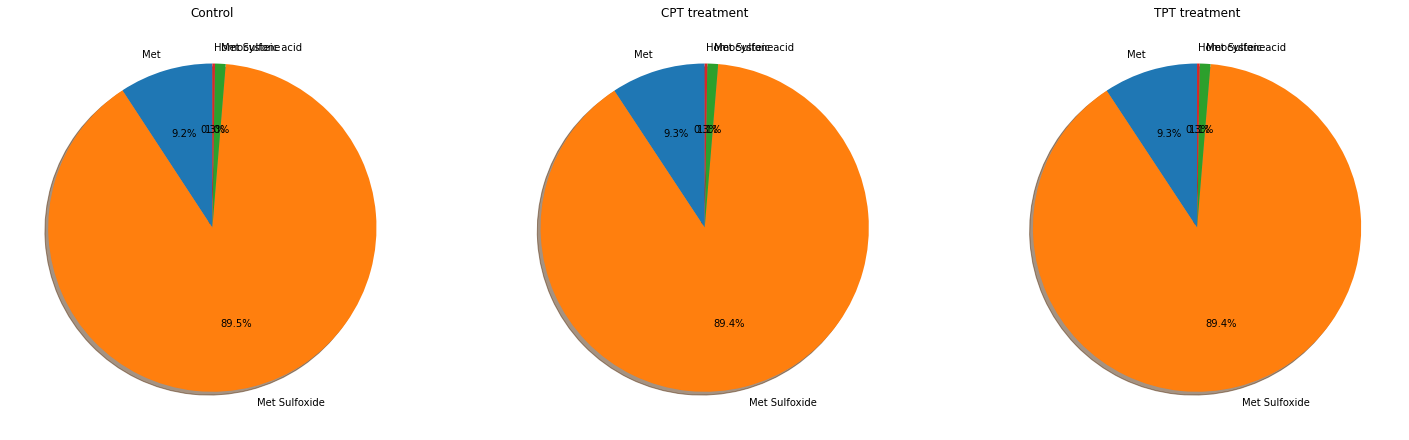

In [8]:
labels = ["Met", "Met Sulfoxide", "Met Sulfone", "Homocysteic acid"]
sizesC = []
sizesCPT = []
sizesTPT = []
for x, y in Controldict.items():
    sizesC.append(y)
for x, y in CPTdict.items():
    sizesCPT.append(y)
for x, y in TPTdict.items():
    sizesTPT.append(y)


fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.pie(sizesC, labels=labels, autopct='%1.1f%%', shadow= True, startangle = 90)
ax2.pie(sizesCPT, labels=labels, autopct='%1.1f%%', shadow= True, startangle= 90)
ax3.pie(sizesCPT, labels=labels, autopct='%1.1f%%', shadow= True, startangle= 90)
plt.title("Methionine containing peptides")
ax1.set_title("Control")
ax2.set_title("CPT treatment")
ax3.set_title("TPT treatment")
fig.set_size_inches(25,50)
plt.show()

In [11]:
NonmodifiedC = quant.loc[quant["Sequence"].str.endswith("nan") & quant["Base Sequence"].str.contains("C")]
Sulfenic = quant.loc[quant["Sequence"].str.contains("[35]oxidation[C]",regex=False)]
Sulfinic = quant.loc[quant["Sequence"].str.contains("[425]Dioxidation[C]", regex = False)]
Cysteic = quant.loc[quant["Sequence"].str.contains("[345]Trioxidation[C]", regex = False)]
Non_modified = NonmodifiedC.append(NonmodifiedC.sum(numeric_only=True), ignore_index=True)[-1:]
Sulfenic_acid = Sulfenic.append(Sulfenic.sum(numeric_only=True), ignore_index=True)[-1:]
Sulfinic_acid = Sulfinic.append(Sulfinic.sum(numeric_only=True), ignore_index=True)[-1:]
Cysteic_acid = Cysteic.append(Cysteic.sum(numeric_only=True), ignore_index=True)[-1:]
moddfc = [Non_modified, Sulfenic_acid, Sulfinic_acid, Cysteic_acid]

In [12]:
Controldict = {}
CPTdict = {}
TPTdict = {}
for i in moddfc:
    name = OA.retrieve_name(i)[1]
    df = i.filter(regex=r'qe1')
    Controlsub = df.loc[:, df.columns.str.contains("|".join(ControlID))]
    CPTsub = df.loc[:, df.columns.str.contains("|".join(CPTID))]
    TPTsub = df.loc[:, df.columns.str.contains("|".join(TPTID))]
    Controlsum = Controlsub.sum(axis=1)
    CPTsum = CPTsub.sum(axis=1)
    TPTsum = TPTsub.sum(axis=1)
    Controldict[name] = Controlsum.values[0]
    CPTdict[name] = CPTsum.values[0]
    TPTdict[name] = TPTsum.values[0]

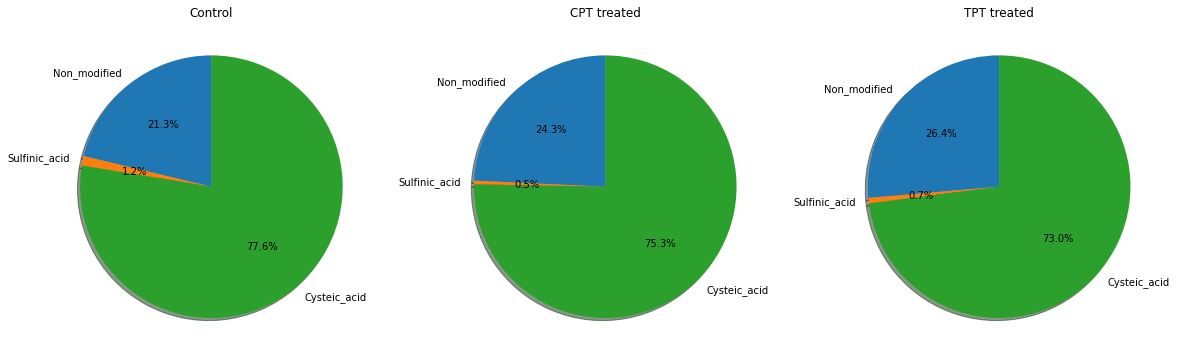

In [13]:
labelsC = []
labelsCPT = []
labelsTPT = []
sizesC = []
sizesCPT = []
sizesTPT = []

for x, y in Controldict.items():
    if y != 0:
        labelsC.append(x)
        sizesC.append(y)
for x, y in CPTdict.items():
    if y != 0:
        labelsCPT.append(x)
        sizesCPT.append(y)
for x, y in TPTdict.items():
    if y != 0:
        labelsTPT.append(x)
        sizesTPT.append(y)

fig, (ax1, ax2, ax3) = plt.subplots(1, 3)
ax1.pie(sizesC, labels=labelsC, autopct='%1.1f%%', shadow= True, startangle = 90)
ax2.pie(sizesCPT, labels=labelsCPT, autopct='%1.1f%%', shadow= True, startangle= 90)
ax3.pie(sizesTPT, labels = labelsTPT, autopct='%1.1f%%', shadow= True, startangle= 90)
ax1.set_title("Control")
ax2.set_title("CPT treated")
ax3.set_title("TPT treated")
fig.set_size_inches(20,40)
plt.show()